In [1]:
%pwd

'C:\\Users\\Abhijith'

In [2]:
%cd downloads

C:\Users\Abhijith\downloads


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
class EDA_analysis :
    
    def __init__(self):
        print("General EDA Analysis initialised")
#         print("-----------------------------")
        
    def show_basicDetails(self,df):
        print("\n1. Shape of the data :",df.shape)
        print("-------------------------------------")
        print("\n2. Number of observations:",df.shape[0])
        print("-------------------------------------")
        row_initial = df.shape[0]
        print("\n3. Number of features:",df.shape[1])
        print("-------------------------------------")
#         print("\n")
        print("\n4. Data type information:")
        print("-------------------------------------")
        print(df.info())
        print("-------------------------------------")
        print("\ncheck for duplicate values\n")
        if len(df[df.duplicated()]) > 0:
            print("\n***5. Number of duplicated entries: ", len(df[df.duplicated()]))
            display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
        else:
            print("\n5. No duplicate entries found")


        df.drop_duplicates(subset = None, keep = False, inplace = True)
        row_final = df.shape[0]
        if len(df[df.duplicated()]) > 0:
            print("Dropped all the dulipicate values, total {} rows were removed".format(row_initial-row_final))
        
    def top5_visual(self,df):      
    #Given dataframe, generate top 5 unique values for non-numeric data
        plt.subplots(figsize=(30,7))
#         plt.tight_layout()
        
        subpolot_index = 181
    
        columns = df[['PRODUCTLINE','STATUS','DEALSIZE']]
#         print(columns)
        for col in columns:
            
            print("Top 5 unique values of " + col)
            print("--------------------------------")
            plt.subplot(subpolot_index)
            plt.tight_layout()
            plt.xticks(rotation=90)
            sns.countplot(df[col], order = df[col].value_counts().index,palette='GnBu')
            plt.tight_layout()
            print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
                  :min(5, len(df[col].value_counts()))])
            subpolot_index = subpolot_index+1
            
        


        
    def missingValues(self,df):

        missingValues = df.isnull().sum()
        
        i= 0
        for val in missingValues.values :
            if val > 0:
                i = i+1

        if i > 0 :
            
            print("\n")
            print("Missing Value Counts by Features")
            print("----------------------------------")
            print("There are {} features with missing values".format(i))
            print(missingValues.sort_values(ascending=False, inplace=True))
#             print("Missing value Visualization, columns having white lines has missing values")
#             msno.matrix(df)
            
        else:
            print("***********No missing values found in none of the features******")    
        
        
            
    def missingValues_handling(self,df):
        df = df.dropna(inplace = True)
        print("All the null values are removed")
        print("----------------------------------\n\n")
        print(df.isnull().sum())
        
    def Tabulation(self,x):
        table = pd.DataFrame(x.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(x.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = x.isnull().sum().values    
        table['No of Uniques'] = x.nunique().values
        table['Percent of Missing'] = ((x.isnull().sum().values)/ (x.shape[0])) *100
        
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True), base=2),2)
        return table
      
    def remove_feature(self,feature,df,inplace = True):
        df.drop(feature,axis = 1,inplace = inplace)
        print("---------Removed {} from the data set,updated data set is below------".format(feature))
        return df.head(5)
        
    def num_count_summary(self,df):
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0] * 100
            data_info_num.loc[c,'Count of outliers']= self.__outlier_count(df_num[c])
            i = i+1 #number of columns cross-check
            
        return data_info_num
    
    
    def statistical_summary(self,df):
    
        df_num = df._get_numeric_data()

        data_stat_sum = pd.DataFrame()

        try:

            data_stat_sum = pd.concat([df.describe().transpose(),
                                     pd.DataFrame(df_num.quantile(q = 0.10)),
                                     pd.DataFrame(df_num.quantile(q = 0.90)),
                                     pd.DataFrame(df_num.quantile(q = 0.95))],axis = 1)
            data_stat_sum.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']

        except:
            pass
        
        
        columns = df.select_dtypes(include=np.number).columns
        figure = plt.figure(figsize=(30, 13))
        figure.tight_layout()
        figure.add_subplot(1, len(columns), 1)
        for index, col in enumerate(columns):
            if index > 0:
                figure.add_subplot(1, len(columns), index + 1)
            box_plot = sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
        figure.tight_layout()    
#         plt.show()
        display(data_stat_sum)

        return box_plot
    
    
    def __iqr(self,x):
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __outlier_count(self,x):
        upper_out = x.quantile(q=0.75) + 1.5 * self.__iqr(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__iqr(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])
    
    
    def eda_univariate_cont(self,feature, l=8,b=8):
   
        mini = feature.min()
        maxi = feature.max()
        rang = maxi -mini
        mean = feature.mean()
        skew = feature.skew()
        kurt = feature.kurtosis()
        median = feature.median()
        std_dev = feature.std()
        points = mean-std_dev, mean+std_dev
        fig, axes=plt.subplots()
    #     axes.legend(prop={'size': 20})
    #     sns.color_palette("mako")
        sns.set_palette("GnBu", 3)
        sns.set_context('poster',font_scale=0.75)
#         sns.histplot(feature,bins= 25)
        sns.distplot(a=feature, color='#ff4125')
    #     sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini, maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        fig.set_size_inches(l,b)
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {};\nmean = {};median =  {}'.format(round(std_dev,2),
                                    round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),
                                    round(rang,2)),round(mean,2), round(median,2)))
        plt.tight_layout()



    
        
        
    
        
        

In [156]:
covid_data = pd.read_excel("C:/Users/Pranjal_S/Downloads/Top 75 WHO data.xlsx")
covid_data.head(5)

Name       WHO Region  Cases - cumulative total  \
0  United States of America         Americas                  33343961   
1                     India  South-East Asia                  30458251   
2                    Brazil         Americas                  18557141   
3                    France           Europe                   5667081   
4        Russian Federation           Europe                   5561360   

   Deaths - cumulative total  Mortality_Rate  \
0                     599680        0.017985   
1                     400312        0.013143   
2                     518066        0.027917   
3                     110190        0.019444   
4                     136565        0.024556   

   Current health expenditure (% of GDP) Coefficient of human inequality  \
0                                   17.1                            12.1   
1                                    3.5                            25.7   
2                                    9.5                            24.4   
3                                   11.3                             8.9   
4                                    5.3                              10   

   Exports and imports (% of GDP)  \
0                            26.4   
1                            40.0   
2                            29.0   
3                            64.5   
4                            49.1   

  Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                                3.5                  
1                                               34.7                  
2                                                  7                  
3                                                NaN                  
4                                                NaN                  

   Carbon dioxide emissions, production emissions per capita (tonnes)  ...  \
0                                               16.6                   ...   
1                                                2.0                   ...   
2                                                2.2                   ...   
3                                                5.2                   ...   
4                                               11.7                   ...   

   Internet users, total (% of population)  Life expectancy index  \
0                                     87.3                  0.906   
1                                     34.5                  0.764   
2                                     67.5                  0.860   
3                                     82.0                  0.964   
4                                     80.9                  0.809   

   Literacy rate, adult (% ages 15 and older)  \
0                                         NaN   
1                                        74.4   
2                                        93.2   
3                                         NaN   
4                                        99.7   

   Population density (people per sq. km of land area)  \
0                                          35.730096     
1                                         454.946466     
2                                          25.061715     
3                                         122.547844     
4                                           8.822068     

  PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
0                                           7.409442                       
1                                          90.873210                       
2                                          12.706629                       
3                                          11.814964                       
4                                          16.160224                       

   Prevalence of undernourishment (% of population)  \
0                                               2.5   
1                                              14.0   
2                               

In [157]:
covid_data.drop(["Unnamed: 33","Unnamed: 34"], axis = 1, inplace = True)
covid_data.head()

Name       WHO Region  Cases - cumulative total  \
0  United States of America         Americas                  33343961   
1                     India  South-East Asia                  30458251   
2                    Brazil         Americas                  18557141   
3                    France           Europe                   5667081   
4        Russian Federation           Europe                   5561360   

   Deaths - cumulative total  Mortality_Rate  \
0                     599680        0.017985   
1                     400312        0.013143   
2                     518066        0.027917   
3                     110190        0.019444   
4                     136565        0.024556   

   Current health expenditure (% of GDP) Coefficient of human inequality  \
0                                   17.1                            12.1   
1                                    3.5                            25.7   
2                                    9.5                            24.4   
3                                   11.3                             8.9   
4                                    5.3                              10   

   Exports and imports (% of GDP)  \
0                            26.4   
1                            40.0   
2                            29.0   
3                            64.5   
4                            49.1   

  Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                                3.5                  
1                                               34.7                  
2                                                  7                  
3                                                NaN                  
4                                                NaN                  

   Carbon dioxide emissions, production emissions per capita (tonnes)  ...  \
0                                               16.6                   ...   
1                                                2.0                   ...   
2                                                2.2                   ...   
3                                                5.2                   ...   
4                                               11.7                   ...   

   Human Development Index (HDI)  Income index  \
0                          0.926         0.976   
1                          0.645         0.635   
2                          0.765         0.749   
3                          0.901         0.930   
4                          0.824         0.841   

   Internet users, total (% of population)  Life expectancy index  \
0                                     87.3                  0.906   
1                                     34.5                  0.764   
2                                     67.5                  0.860   
3                                     82.0                  0.964   
4                                     80.9                  0.809   

  Literacy rate, adult (% ages 15 and older)  \
0                                        NaN   
1                                       74.4   
2                                       93.2   
3                                        NaN   
4                                       99.7   

   Population density (people per sq. km of land area)  \
0                                          35.730096     
1                                         454.946466     
2                                          25.061715     
3                                         122.547844     
4                                           8.822068     

  PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
0                                           7.409442                       
1                                          90.873210                       
2                                          12.706629                       
3                                          11.814964   

In [158]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 33 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Name                                                                                 72 non-null     object 
 1   WHO Region                                                                           72 non-null     object 
 2   Cases - cumulative total                                                             72 non-null     int64  
 3   Deaths - cumulative total                                                            72 non-null     int64  
 4   Mortality_Rate                                                                       72 non-null     float64
 5   Current health expenditure (% of GDP)                                                72 non-nu

In [159]:
df_datatypes = pd.DataFrame(covid_data.dtypes,columns=['Type']).reset_index()
df_datatypes.columns = ['Feature','Type']
df_datatypes

Feature     Type
0                                                Name   object
1                                          WHO Region   object
2                            Cases - cumulative total    int64
3                           Deaths - cumulative total    int64
4                                      Mortality_Rate  float64
5               Current health expenditure (% of GDP)  float64
6                     Coefficient of human inequality   object
7                      Exports and imports (% of GDP)  float64
8   Child malnutrition, stunting (moderate or seve...   object
9   Carbon dioxide emissions, production emissions...  float64
10                         Physicians per population   float64
11                       Hospital beds per population  float64
12                                 Median age (years)  float64
13  Mortality rate attributed to household and amb...  float64
14               Multidimensional poverty index (MPI)   object
15          Population ages 65 and older (per capita)  float64
16  Population living below income poverty line, n...   object
17                                   Total population  float64
18            Unemployment, total (% of labour force)  float64
19                               Urban population (%)  float64
20                       Forest area (% of land area)  float64
21                        GDP per capita (2017 PPP $)   object
22     Government expenditure on education (% of GDP)   object
23                      Human Development Index (HDI)  float64
24                                       Income index  float64
25            Internet users, total (% of population)  float64
26                              Life expectancy index  float64
27         Literacy rate, adult (% ages 15 and older)   object
28  Population density (people per sq. km of land ...  float64
29  PM2.5 air pollution, mean annual exposure (mic...  float64
30   Prevalence of undernourishment (% of population)  float64
31  Diabetes prevalence (% of population ages 20 t...  float64
32            Tuberculosis incidence (per population)  float64

In [160]:
covid_data.replace(to_replace = '..', value = np.nan, inplace = True)

In [161]:
covid_data[['Government expenditure on education (% of GDP)','GDP per capita (2017 PPP $)', 'Literacy rate, adult (% ages 15 and older)','Population living below income poverty line, national poverty line (%)','Multidimensional poverty index (MPI)','Child malnutrition, stunting (moderate or severe) (% under age 5)','Coefficient of human inequality']].astype('float')
df_datatypes = pd.DataFrame(covid_data.dtypes,columns=['Type']).reset_index()
df_datatypes.columns = ['Feature','Type']
df_datatypes

Feature     Type
0                                                Name   object
1                                          WHO Region   object
2                            Cases - cumulative total    int64
3                           Deaths - cumulative total    int64
4                                      Mortality_Rate  float64
5               Current health expenditure (% of GDP)  float64
6                     Coefficient of human inequality  float64
7                      Exports and imports (% of GDP)  float64
8   Child malnutrition, stunting (moderate or seve...  float64
9   Carbon dioxide emissions, production emissions...  float64
10                         Physicians per population   float64
11                       Hospital beds per population  float64
12                                 Median age (years)  float64
13  Mortality rate attributed to household and amb...  float64
14               Multidimensional poverty index (MPI)  float64
15          Population ages 65 and older (per capita)  float64
16  Population living below income poverty line, n...  float64
17                                   Total population  float64
18            Unemployment, total (% of labour force)  float64
19                               Urban population (%)  float64
20                       Forest area (% of land area)  float64
21                        GDP per capita (2017 PPP $)  float64
22     Government expenditure on education (% of GDP)  float64
23                      Human Development Index (HDI)  float64
24                                       Income index  float64
25            Internet users, total (% of population)  float64
26                              Life expectancy index  float64
27         Literacy rate, adult (% ages 15 and older)  float64
28  Population density (people per sq. km of land ...  float64
29  PM2.5 air pollution, mean annual exposure (mic...  float64
30   Prevalence of undernourishment (% of population)  float64
31  Diabetes prevalence (% of population ages 20 t...  float64
32            Tuberculosis incidence (per population)  float64

In [162]:
covid_data.isnull().sum().sort_values(ascending = False)

Multidimensional poverty index (MPI)                                                   43
Child malnutrition, stunting (moderate or severe) (% under age 5)                      28
Population living below income poverty line, national poverty line (%)                 25
Literacy rate, adult (% ages 15 and older)                                             17
Government expenditure on education (% of GDP)                                         16
Coefficient of human inequality                                                         7
Diabetes prevalence (% of population ages 20 to 79)                                     3
Prevalence of undernourishment (% of population)                                        3
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)                  3
Population density (people per sq. km of land area)                                     3
Physicians per population                                                               3
Hospital b

In [163]:
covid_data.drop("Multidimensional poverty index (MPI)", axis = 1, inplace = True)
covid_data.isnull().sum().sort_values(ascending = False)

Child malnutrition, stunting (moderate or severe) (% under age 5)                      28
Population living below income poverty line, national poverty line (%)                 25
Literacy rate, adult (% ages 15 and older)                                             17
Government expenditure on education (% of GDP)                                         16
Coefficient of human inequality                                                         7
Diabetes prevalence (% of population ages 20 to 79)                                     3
Prevalence of undernourishment (% of population)                                        3
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)                  3
Population density (people per sq. km of land area)                                     3
Physicians per population                                                               3
Hospital beds per population                                                            3
GDP per ca

In [164]:
covid_data.isnull().sum(axis = 1).sort_values(ascending = False)

59    6
53    6
67    6
63    5
62    5
     ..
39    0
44    0
45    0
47    0
71    0
Length: 72, dtype: int64

In [75]:
covid_data.iloc[71,:]

Name                                                                                                 Bahrain
WHO Region                                                                             Eastern Mediterranean
Cases - cumulative total                                                                              265827
Deaths - cumulative total                                                                               1352
Mortality_Rate                                                                                      0.005086
Current health expenditure (% of GDP)                                                                    NaN
Coefficient of human inequality                                                                          NaN
Exports and imports (% of GDP)                                                                           NaN
Child malnutrition, stunting (moderate or severe) (% under age 5)                                        NaN
Carbon dioxide emis

In [165]:
#covid_data.drop(59, axis = 0, inplace = True)
#covid_data.drop(71, axis = 0, inplace = True)
#covid_data.isnull().sum(axis = 1).sort_values(ascending = False)

In [166]:
covid_data.shape

(72, 32)

In [27]:
a = EDA_analysis()
a.num_count_summary(covid_data).style.background_gradient(cmap='Blues')

General EDA Analysis initialised


In [167]:
covid_data["Forest area (% of land area)"].replace(to_replace=0, value=np.nan, inplace = True)
a.num_count_summary(covid_data).style.background_gradient(cmap='Blues')

In [168]:
covid_data["Forest area (% of land area)"].isnull().sum()

1

In [169]:
covid_data["Forest area (% of land area)"].dtype

dtype('float64')

In [173]:
intColumns = []
for col in covid_data.columns:
    if(covid_data[col].dtype != "object"):
        intColumns.append(col)

intColumns

['Mortality_Rate',
 'Current health expenditure (% of GDP)',
 'Coefficient of human inequality',
 'Exports and imports (% of GDP)',
 'Child malnutrition, stunting (moderate or severe) (% under age 5)',
 'Carbon dioxide emissions, production emissions per capita (tonnes)',
 'Physicians per population ',
 'Hospital beds per population',
 'Median age (years)',
 'Mortality rate attributed to household and ambient air pollution (age-standardized)',
 'Population ages 65 and older (per capita)',
 'Population living below income poverty line, national poverty line (%)',
 'Total population',
 'Unemployment, total (% of labour force)',
 'Urban population (%)',
 'Forest area (% of land area)',
 'GDP per capita (2017 PPP $)',
 'Government expenditure on education (% of GDP)',
 'Human Development Index (HDI)',
 'Income index',
 'Internet users, total (% of population)',
 'Life expectancy index',
 'Literacy rate, adult (% ages 15 and older)',
 'Population density (people per sq. km of land area)',
 

In [171]:
covid_data.drop(["Cases - cumulative total","Deaths - cumulative total"], axis = 1, inplace = True)

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(covid_data[intColumns]), columns = intColumns)
df_scaled.head()

Mortality_Rate  Current health expenditure (% of GDP)  \
0        0.166438                               1.000000   
1        0.113153                               0.144654   
2        0.275752                               0.522013   
3        0.182497                               0.635220   
4        0.238759                               0.257862   

   Coefficient of human inequality  Exports and imports (% of GDP)  \
0                         0.287313                        0.000000   
1                         0.794776                        0.063910   
2                         0.746269                        0.012218   
3                         0.167910                        0.179041   
4                         0.208955                        0.106673   

   Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                           0.040000                   
1                                           0.733333                   
2                                           0.117778                   
3                                                NaN                   
4                                                NaN                   

   Carbon dioxide emissions, production emissions per capita (tonnes)  \
0                                           0.699153                    
1                                           0.080508                    
2                                           0.088983                    
3                                           0.216102                    
4                                           0.491525                    

   Physicians per population   Hospital beds per population  \
0                    0.336078                      0.202681   
1                    0.077628                      0.018139   
2                    0.270143                      0.141167   
3                    0.432571                      0.442429   
4                    0.542540                      0.537855   

   Median age (years)  \
0            0.650519   
1            0.307958   
2            0.484429   
3            0.788927   
4            0.695502   

   Mortality rate attributed to household and ambient air pollution (age-standardized)  \
0                                           0.032086                                     
1                                           0.946524                                     
2                                           0.122995                                     
3                                           0.016043                                     
4                                           0.224599                                     

   ...  Human Development Index (HDI)  Income index  \
0  ...                       0.938298      0.976967   
1  ...                       0.340426      0.322457   
2  ...                       0.595745      0.541267   
3  ...                       0.885106      0.888676   
4  ...                       0.721277      0.717850   

   Internet users, total (% of population)  Life expectancy index  \
0                                 0.854610               0.720635   
1                                 0.230496               0.269841   
2                                 0.620567               0.574603   
3                                 0.791962               0.904762   
4                                 0.778960               0.412698   

   Literacy rate, adult (% ages 15 and older)  \
0                                         NaN   
1                                    0.468880   
2                                    0.858921   
3                                         NaN   
4                                    0.993776   

   Population density (people per sq. km of land area)  \
0                                           0.025571     
1                                           0.364852     
2                                           0.016937     
3    

In [175]:
df_scaled.shape

(72, 28)

In [176]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights = "distance")
imputed = imputer.fit_transform(df_scaled)
df = pd.DataFrame(imputed, columns = df_scaled.columns)
df.head()

Mortality_Rate  Current health expenditure (% of GDP)  \
0        0.166438                               1.000000   
1        0.113153                               0.144654   
2        0.275752                               0.522013   
3        0.182497                               0.635220   
4        0.238759                               0.257862   

   Coefficient of human inequality  Exports and imports (% of GDP)  \
0                         0.287313                        0.000000   
1                         0.794776                        0.063910   
2                         0.746269                        0.012218   
3                         0.167910                        0.179041   
4                         0.208955                        0.106673   

   Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                           0.040000                   
1                                           0.733333                   
2                                           0.117778                   
3                                           0.047810                   
4                                           0.083998                   

   Carbon dioxide emissions, production emissions per capita (tonnes)  \
0                                           0.699153                    
1                                           0.080508                    
2                                           0.088983                    
3                                           0.216102                    
4                                           0.491525                    

   Physicians per population   Hospital beds per population  \
0                    0.336078                      0.202681   
1                    0.077628                      0.018139   
2                    0.270143                      0.141167   
3                    0.432571                      0.442429   
4                    0.542540                      0.537855   

   Median age (years)  \
0            0.650519   
1            0.307958   
2            0.484429   
3            0.788927   
4            0.695502   

   Mortality rate attributed to household and ambient air pollution (age-standardized)  \
0                                           0.032086                                     
1                                           0.946524                                     
2                                           0.122995                                     
3                                           0.016043                                     
4                                           0.224599                                     

   ...  Human Development Index (HDI)  Income index  \
0  ...                       0.938298      0.976967   
1  ...                       0.340426      0.322457   
2  ...                       0.595745      0.541267   
3  ...                       0.885106      0.888676   
4  ...                       0.721277      0.717850   

   Internet users, total (% of population)  Life expectancy index  \
0                                 0.854610               0.720635   
1                                 0.230496               0.269841   
2                                 0.620567               0.574603   
3                                 0.791962               0.904762   
4                                 0.778960               0.412698   

   Literacy rate, adult (% ages 15 and older)  \
0                                    0.953226   
1                                    0.468880   
2                                    0.858921   
3                                    0.963211   
4                                    0.993776   

   Population density (people per sq. km of land area)  \
0                                           0.025571     
1                                           0.364852     
2                                           0.016937     
3    

In [177]:
df.isnull().sum()

Mortality_Rate                                                                         0
Current health expenditure (% of GDP)                                                  0
Coefficient of human inequality                                                        0
Exports and imports (% of GDP)                                                         0
Child malnutrition, stunting (moderate or severe) (% under age 5)                      0
Carbon dioxide emissions, production emissions per capita (tonnes)                     0
Physicians per population                                                              0
Hospital beds per population                                                           0
Median age (years)                                                                     0
Mortality rate attributed to household and ambient air pollution (age-standardized)    0
Population ages 65 and older (per capita)                                              0
Population living bel

In [100]:
#for col in covid_data.columns:
 #   if(covid_data[col].dtype != "object"):
  #      covid_data[col] = df[col]

In [178]:
df["Name"] = covid_data["Name"]
df["WHO Region"] = covid_data["WHO Region"]
df.isnull().sum()

Mortality_Rate                                                                         0
Current health expenditure (% of GDP)                                                  0
Coefficient of human inequality                                                        0
Exports and imports (% of GDP)                                                         0
Child malnutrition, stunting (moderate or severe) (% under age 5)                      0
Carbon dioxide emissions, production emissions per capita (tonnes)                     0
Physicians per population                                                              0
Hospital beds per population                                                           0
Median age (years)                                                                     0
Mortality rate attributed to household and ambient air pollution (age-standardized)    0
Population ages 65 and older (per capita)                                              0
Population living bel

In [179]:
df[df["Name"].isnull()]

Empty DataFrame
Columns: [Mortality_Rate, Current health expenditure (% of GDP), Coefficient of human inequality, Exports and imports (% of GDP), Child malnutrition, stunting (moderate or severe) (% under age 5), Carbon dioxide emissions, production emissions per capita (tonnes), Physicians per population , Hospital beds per population, Median age (years), Mortality rate attributed to household and ambient air pollution (age-standardized), Population ages 65 and older (per capita), Population living below income poverty line, national poverty line (%), Total population, Unemployment, total (% of labour force), Urban population (%), Forest area (% of land area), GDP per capita (2017 PPP $), Government expenditure on education (% of GDP), Human Development Index (HDI), Income index, Internet users, total (% of population), Life expectancy index, Literacy rate, adult (% ages 15 and older), Population density (people per sq. km of land area), PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), Prevalence of undernourishment (% of population), Diabetes prevalence (% of population ages 20 to 79), Tuberculosis incidence (per population), Name, WHO Region]
Index: []

[0 rows x 30 columns]

In [114]:
covid_data.iloc[1,:]

Name                                                                                             India
WHO Region                                                                             South-East Asia
Mortality_Rate                                                                                0.113153
Current health expenditure (% of GDP)                                                         0.144654
Coefficient of human inequality                                                               0.794776
Exports and imports (% of GDP)                                                                 0.06391
Child malnutrition, stunting (moderate or severe) (% under age 5)                             0.733333
Carbon dioxide emissions, production emissions per capita (tonnes)                            0.080508
Physicians per population                                                                     0.077628
Hospital beds per population                                             

In [181]:
df.head()

Mortality_Rate  Current health expenditure (% of GDP)  \
0        0.166438                               1.000000   
1        0.113153                               0.144654   
2        0.275752                               0.522013   
3        0.182497                               0.635220   
4        0.238759                               0.257862   

   Coefficient of human inequality  Exports and imports (% of GDP)  \
0                         0.287313                        0.000000   
1                         0.794776                        0.063910   
2                         0.746269                        0.012218   
3                         0.167910                        0.179041   
4                         0.208955                        0.106673   

   Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                           0.040000                   
1                                           0.733333                   
2                                           0.117778                   
3                                           0.047810                   
4                                           0.083998                   

   Carbon dioxide emissions, production emissions per capita (tonnes)  \
0                                           0.699153                    
1                                           0.080508                    
2                                           0.088983                    
3                                           0.216102                    
4                                           0.491525                    

   Physicians per population   Hospital beds per population  \
0                    0.336078                      0.202681   
1                    0.077628                      0.018139   
2                    0.270143                      0.141167   
3                    0.432571                      0.442429   
4                    0.542540                      0.537855   

   Median age (years)  \
0            0.650519   
1            0.307958   
2            0.484429   
3            0.788927   
4            0.695502   

   Mortality rate attributed to household and ambient air pollution (age-standardized)  \
0                                           0.032086                                     
1                                           0.946524                                     
2                                           0.122995                                     
3                                           0.016043                                     
4                                           0.224599                                     

   ...  Internet users, total (% of population)  Life expectancy index  \
0  ...                                 0.854610               0.720635   
1  ...                                 0.230496               0.269841   
2  ...                                 0.620567               0.574603   
3  ...                                 0.791962               0.904762   
4  ...                                 0.778960               0.412698   

   Literacy rate, adult (% ages 15 and older)  \
0                                    0.953226   
1                                    0.468880   
2                                    0.858921   
3                                    0.963211   
4                                    0.993776   

   Population density (people per sq. km of land area)  \
0                                           0.025571     
1                                           0.364852     
2                                           0.016937     
3                                           0.095835     
4                                           0.003794     

   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
0                                           0.013092                        
1                                  

In [118]:
covid_data.shape

(72, 30)

In [180]:
df.isnull().sum().sort_values(ascending = False)

Mortality_Rate                                                                         0
Current health expenditure (% of GDP)                                                  0
Name                                                                                   0
Tuberculosis incidence (per population)                                                0
Diabetes prevalence (% of population ages 20 to 79)                                    0
Prevalence of undernourishment (% of population)                                       0
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)                 0
Population density (people per sq. km of land area)                                    0
Literacy rate, adult (% ages 15 and older)                                             0
Life expectancy index                                                                  0
Internet users, total (% of population)                                                0
Income index         

In [182]:
df.describe()

Mortality_Rate  Current health expenditure (% of GDP)  \
count       72.000000                              72.000000   
mean         0.213538                               0.367488   
std          0.172552                               0.173509   
min          0.000000                               0.000000   
25%          0.115400                               0.251572   
50%          0.169381                               0.371069   
75%          0.260946                               0.479560   
max          1.000000                               1.000000   

       Coefficient of human inequality  Exports and imports (% of GDP)  \
count                        72.000000                       72.000000   
mean                          0.381351                        0.262956   
std                           0.255054                        0.197568   
min                           0.000000                        0.000000   
25%                           0.146455                        0.118304   
50%                           0.306121                        0.199718   
75%                           0.538246                        0.370771   
max                           1.000000                        1.000000   

       Child malnutrition, stunting (moderate or severe) (% under age 5)  \
count                                          72.000000                   
mean                                            0.215886                   
std                                             0.229094                   
min                                             0.000000                   
25%                                             0.058102                   
50%                                             0.120795                   
75%                                             0.248333                   
max                                             1.000000                   

       Carbon dioxide emissions, production emissions per capita (tonnes)  \
count                                          72.000000                    
mean                                            0.243821                    
std                                             0.209816                    
min                                             0.000000                    
25%                                             0.093220                    
50%                                             0.199153                    
75%                                             0.326271                    
max                                             1.000000                    

       Physicians per population   Hospital beds per population  \
count                   72.000000                     72.000000   
mean                     0.361080                      0.247922   
std                      0.227508                      0.208505   
min                      0.000000                      0.000000   
25%                      0.182107                      0.088328   
50%                      0.336055                      0.172713   
75%                      0.537695                      0.414038   
max                      1.000000                      1.000000   

       Median age (years)  \
count           72.000000   
mean             0.534890   
std              0.261379   
min              0.000000   
25%              0.348616   
50%              0.484429   
75%              0.769896   
max              1.000000   

       Mortality rate attributed to household and ambient air pollution (age-standardized)  \
count                                          72.000000                                     
mean                                            0.251411                                     
std                                             0.238079                                     
min                                             0.000000                                     
25%                                             

In [184]:
df.to_excel("C:\\Users\\Pranjal_S\\Downloads\\df_final.xlsx")

Statistical Summary
-------------------------------


count          mean  \
Cases - cumulative total                             74.0  2.376830e+06   
Cases - cumulative total per 100000 population       74.0  5.674179e+03   
Deaths - cumulative total                            74.0  5.181572e+04   
Deaths - cumulative total per 100000 population      74.0  1.143797e+02   
Current health expenditure (% of GDP)                72.0  7.043056e+00   
Exports and imports (% of GDP)                       72.0  8.235694e+01   
Carbon dioxide emissions, production emissions ...   72.0  5.854167e+00   
Median age (years)                                   72.0  3.495833e+01   
Mortality rate attributed to household and ambi...   72.0  5.401389e+01   
Population ages 65 and older (millions)              72.0  6.388889e+00   
Total population (millions)                          72.0  6.656389e+01   
Unemployment, total (% of labour force)              71.0  6.640845e+00   
Urban population (%)                                 72.0  6.995694e+01   
Forest area (% of land area)                         72.0  2.896605e+01   
Human Development Index (HDI)                        72.0  8.053472e-01   
Income index                                         72.0  8.053472e-01   
Internet users, total (% of population)              72.0  6.965972e+01   
Life expectancy index                                72.0  8.731389e-01   

                                                             std         min  \
Cases - cumulative total                            5.538575e+06  260972.000   
Cases - cumulative total per 100000 population      3.563459e+03     240.290   
Deaths - cumulative total                           1.057277e+05    1352.000   
Deaths - cumulative total per 100000 population     9.388512e+01       3.070   
Current health expenditure (% of GDP)               2.758793e+00       1.200   
Exports and imports (% of GDP)                      4.204243e+01      26.400   
Carbon dioxide emissions, production emissions ...  4.951652e+00       0.100   
Median age (years)                                  7.553858e+00      19.500   
Mortality rate attributed to household and ambi...  4.452076e+01       7.000   
Population ages 65 and older (millions)             1.279042e+01       0.100   
Total population (millions)                         1.684515e+02       2.500   
Unemployment, total (% of labour force)             4.671298e+00       0.800   
Urban population (%)                                1.841102e+01      18.600   
Forest area (% of land area)                        1.836503e+01       0.000   
Human Development Index (HDI)                       1.014036e-01       0.485   
Income index                                        1.191109e-01       0.467   
Internet users, total (% of population)             1.957071e+01      15.000   
Life expectancy index                               6.746983e-02       0.679   

                                                              25%  \
Cases - cumulative total                            368354.000000   
Cases - cumulative total per 100000 population        2616.707500   
Deaths - cumulative total                             5802.000000   
Deaths - cumulative total per 100000 population         41.672500   
Current health expenditure (% of GDP)                    5.200000   
Exports and imports (% of GDP)                          51.575000   
Carbon dioxide emissions, production emissions ...       2.300000   
Median age (years)                                      29.575000   
Mortality rate attributed to household and ambi...      21.750000   
Population ages 65 and older (millions)                  0.900000   
Total population (millions)                              9.225000   
Unemployment, total (% of labour force)                  3.600000   
Urban population (%)                                    58.300000   
Forest area (% of land area)                            13.041536   
Human Development Index (HDI)                            0.743000   
I

<AxesSubplot:ylabel='Life expectancy index'>

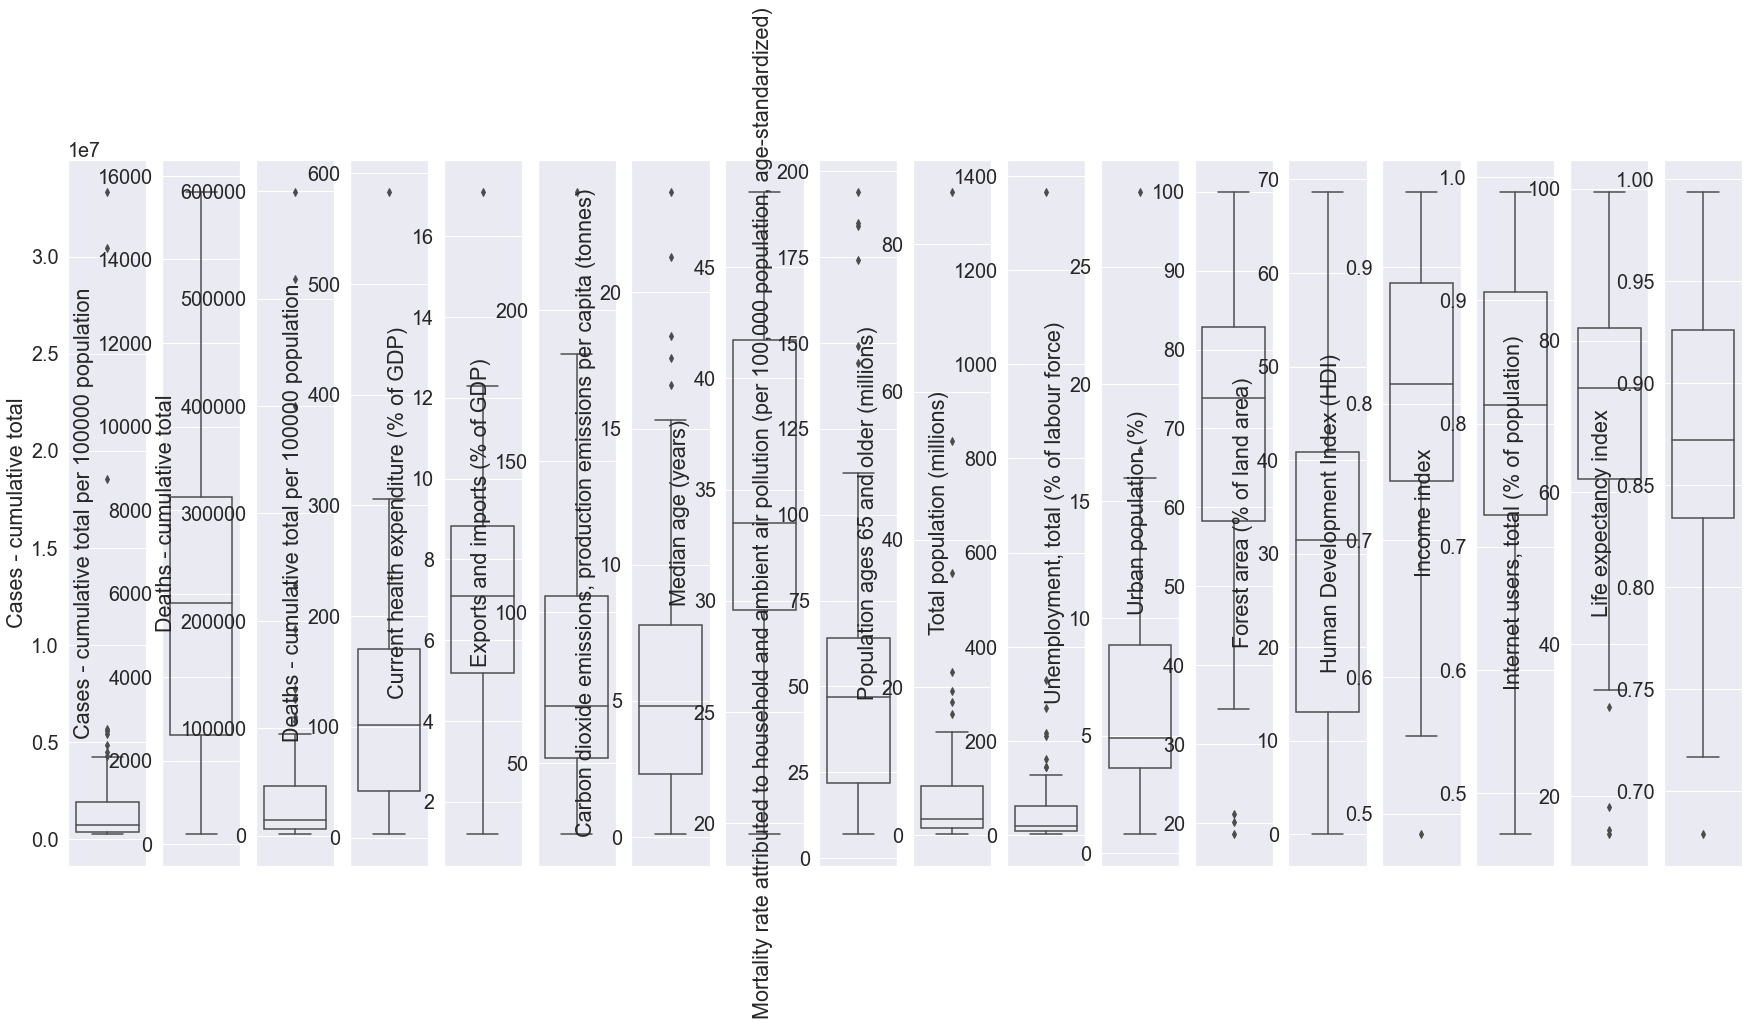

In [353]:
print("Statistical Summary")
print("-------------------------------")
sns.set(font_scale=1.8)
a.statistical_summary(covid_data)

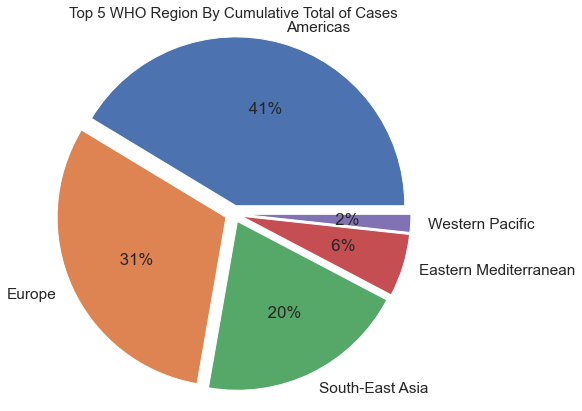

In [357]:
# Top countries by sales value
top_WHOregion = covid_data.groupby('WHO Region')['Cases - cumulative total'].sum().sort_values(ascending=False)[:10]
labels = top_WHOregion[:5].index
size = top_WHOregion[:5].values

plt.figure(figsize=(7,7))
sns.set(font_scale=1.4
       )
plt.pie(size, labels=labels, explode=[0.05]*5, autopct='%3.0f%%')
plt.title("Top 5 WHO Region By Cumulative Total of Cases", size=15)
plt.axis('equal')
plt.show()

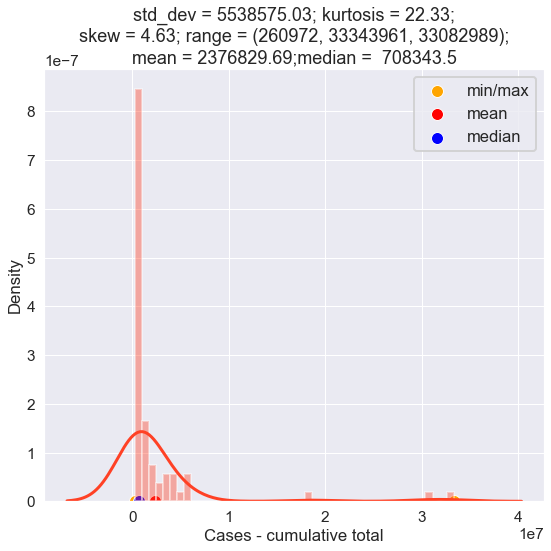

In [358]:
a.eda_univariate_cont(covid_data['Cases - cumulative total'])

In [191]:
a.num_count_summary(covid_data).style.background_gradient(cmap='Blues')

Text(0.5, 0.98, 'Histogram for all numeric feature')

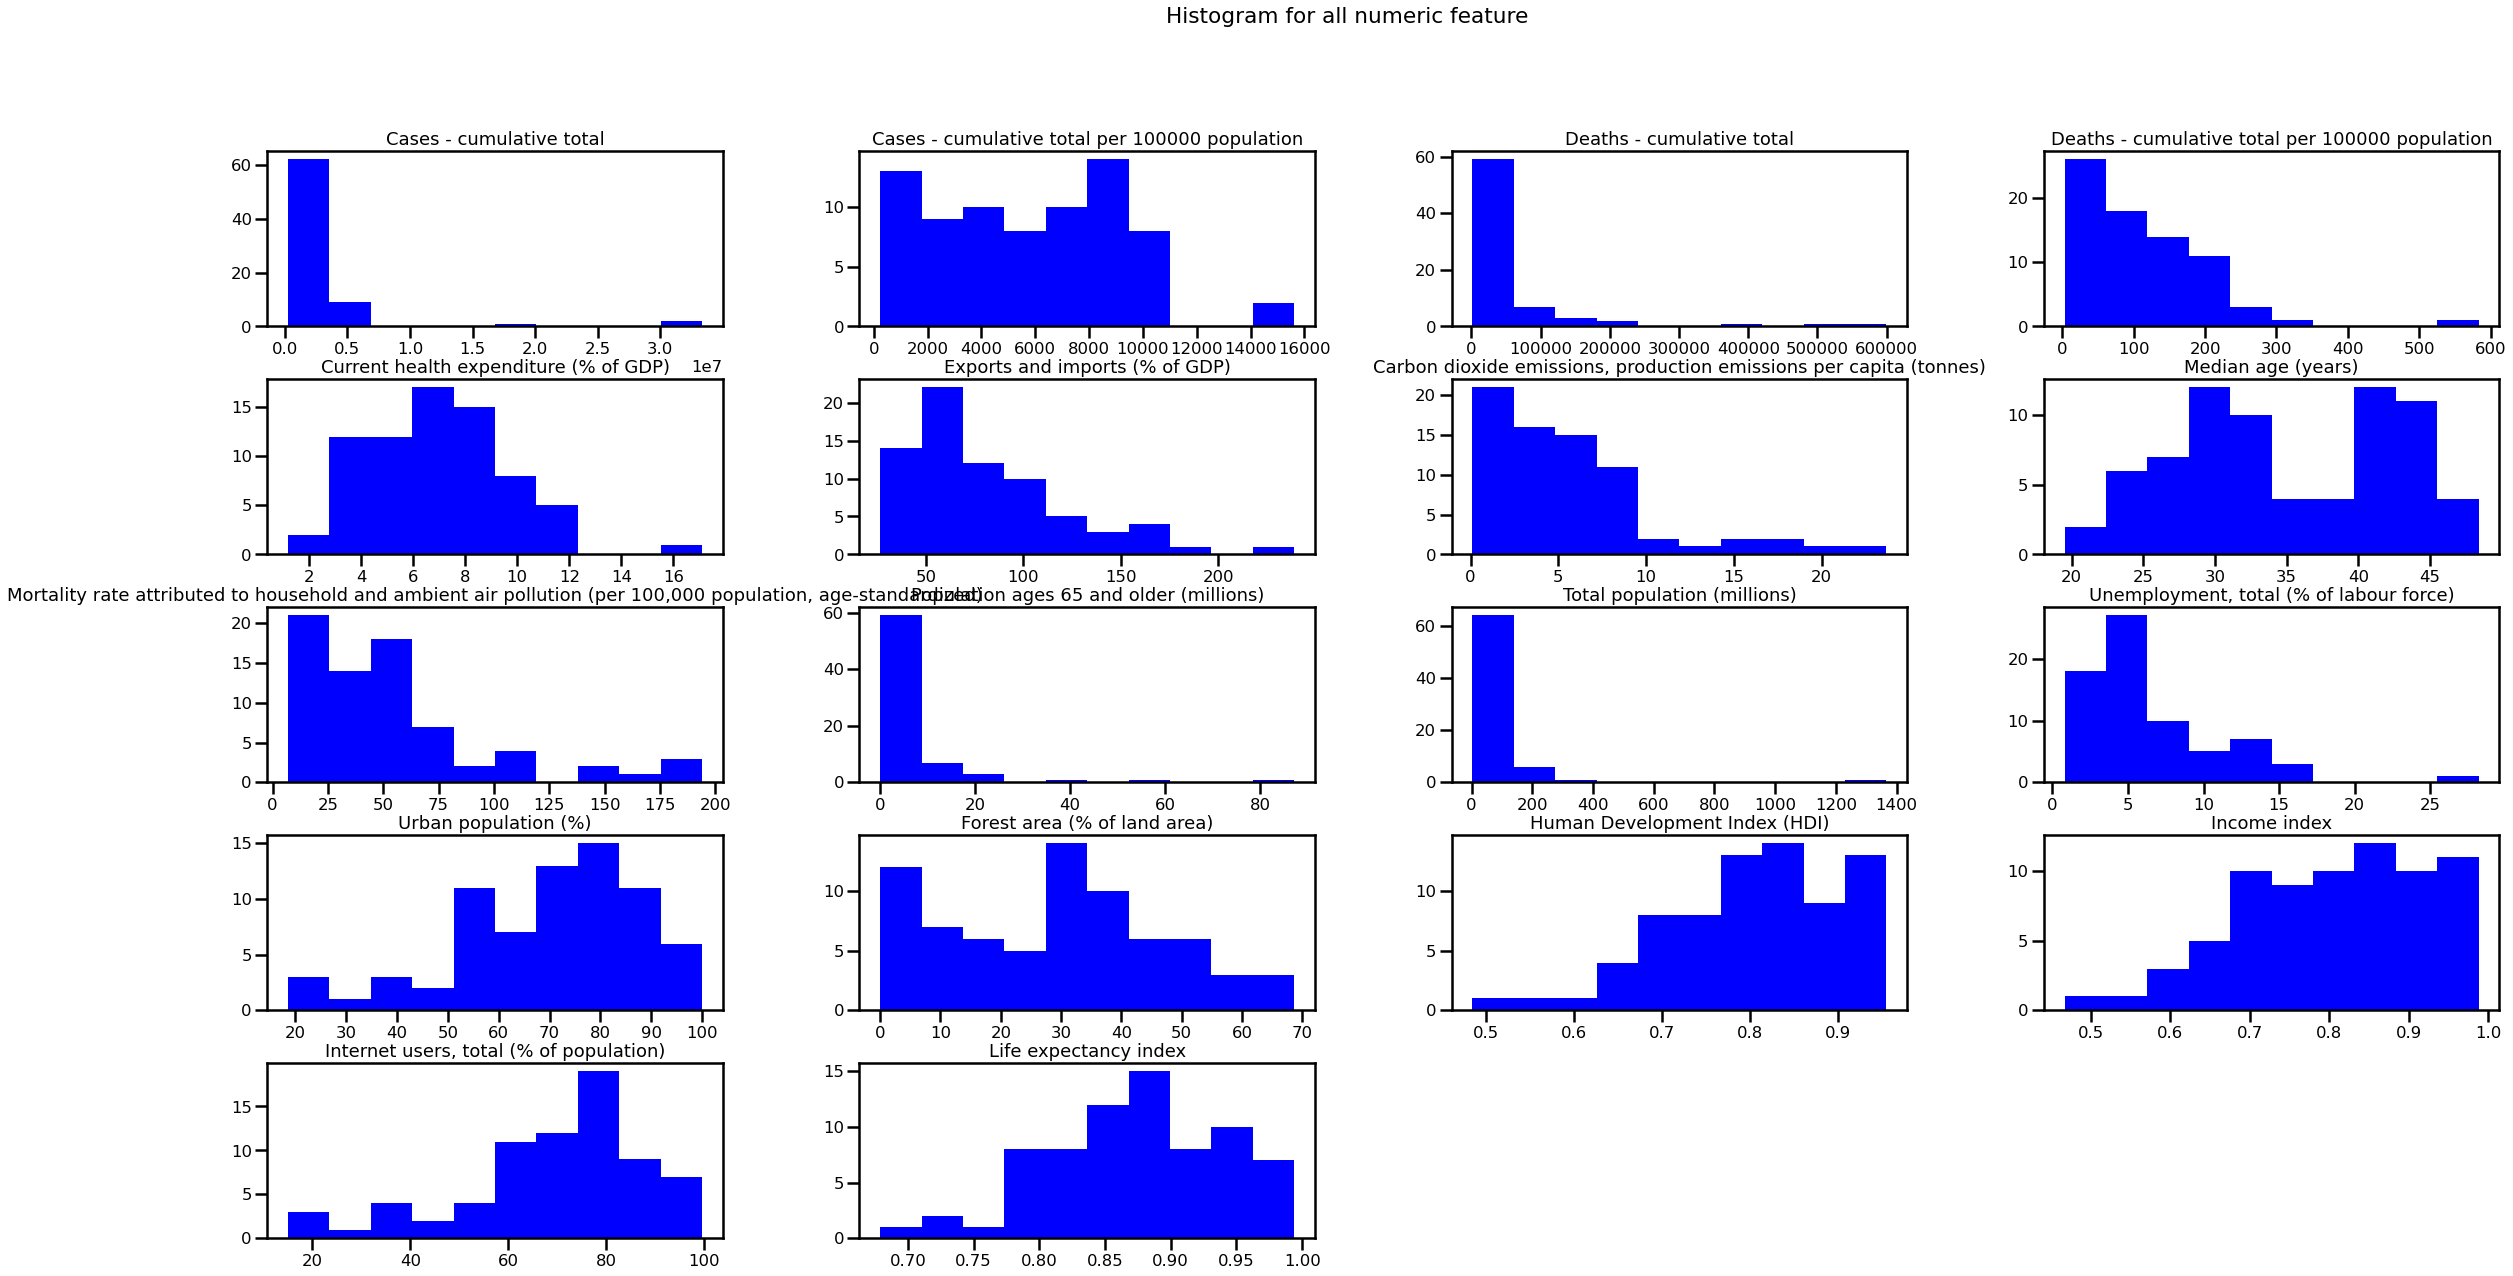

In [193]:
covid_data.hist(layout=(5,4),color = 'blue',figsize=(40,20),grid = False)
plt.suptitle("Histogram for all numeric feature")

In [40]:
len(covid_data.columns)

32

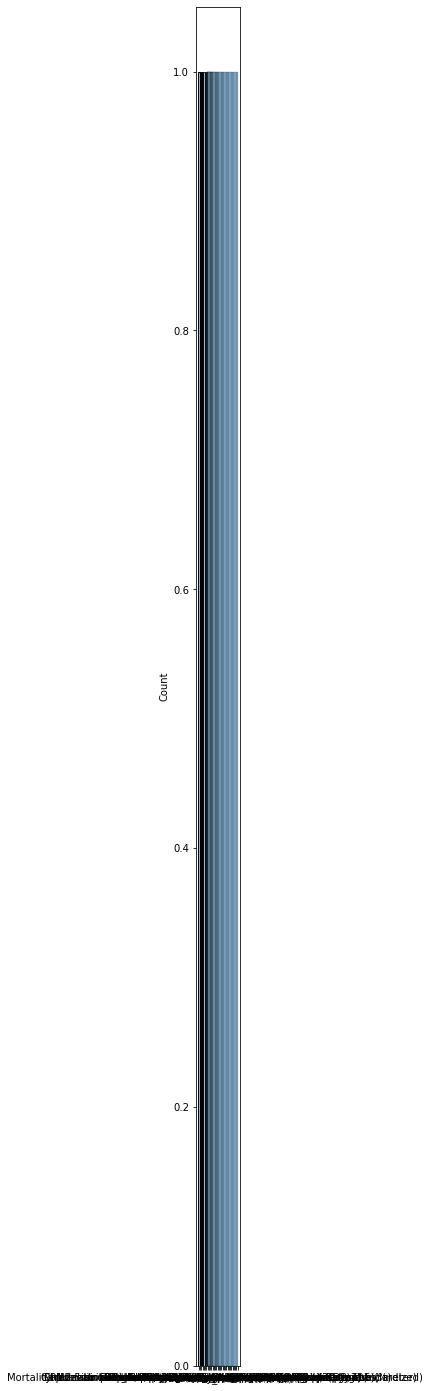

In [39]:
figure = plt.figure(figsize=(30, 20))
for col in covid_data.columns:
    figure.add_subplot(1, len(covid_data.columns), 1)
    sns.histplot(col, kde = True)

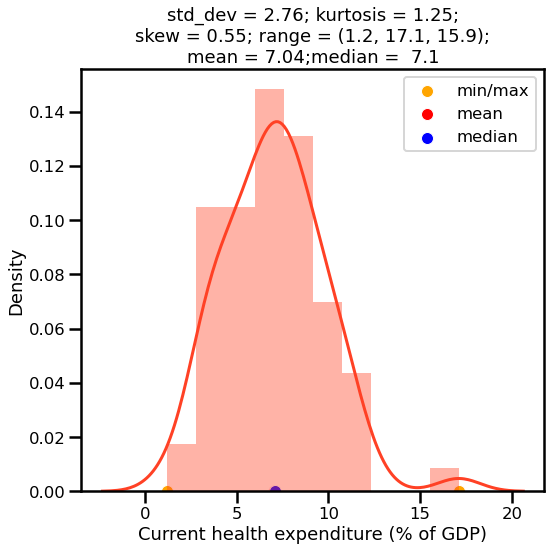

In [194]:
a.eda_univariate_cont(covid_data['Current health expenditure (% of GDP)'])

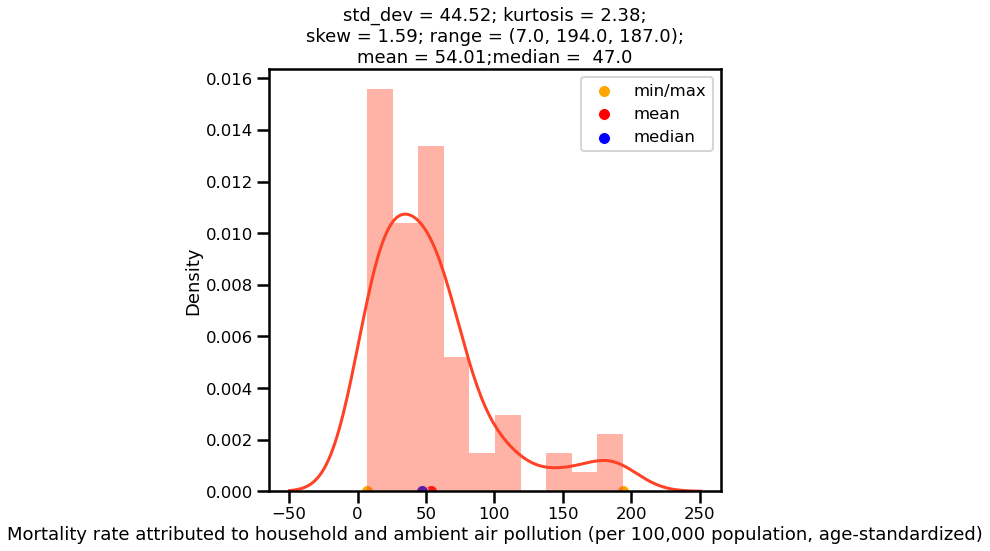

In [195]:
a.eda_univariate_cont(covid_data['Mortality rate attributed to household and ambient air pollution (per 100,000 population, age-standardized)'])

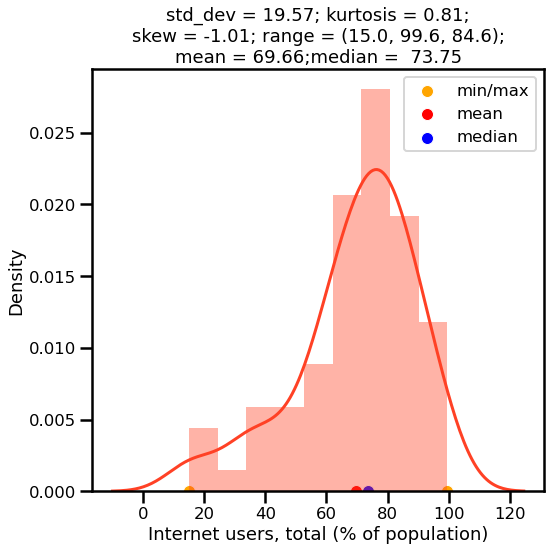

In [196]:
a.eda_univariate_cont(covid_data['Internet users, total (% of population)'])

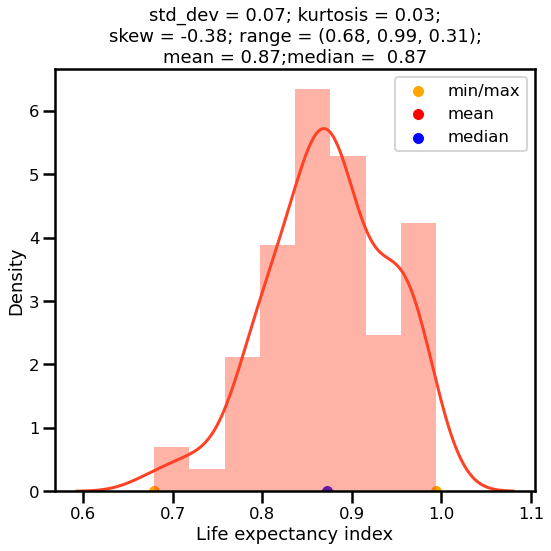

In [197]:
a.eda_univariate_cont(covid_data['Life expectancy index'])

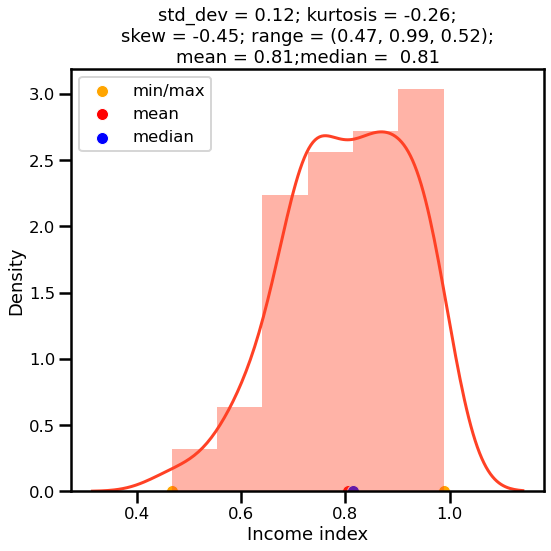

In [198]:
a.eda_univariate_cont(covid_data['Income index'])

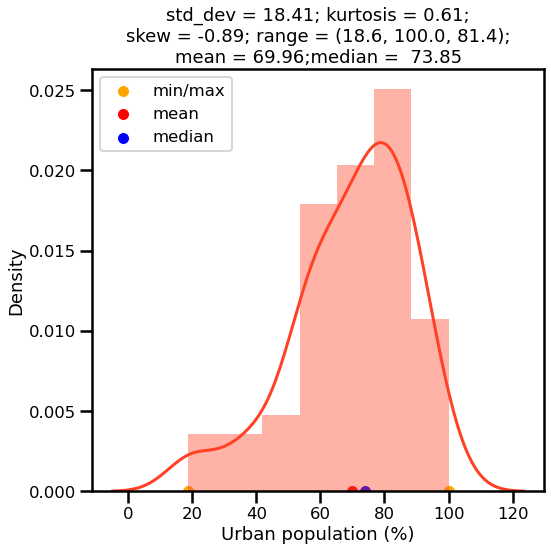

In [199]:
a.eda_univariate_cont(covid_data['Urban population (%)'])

Countries like Kuwait has 100% Urban Population

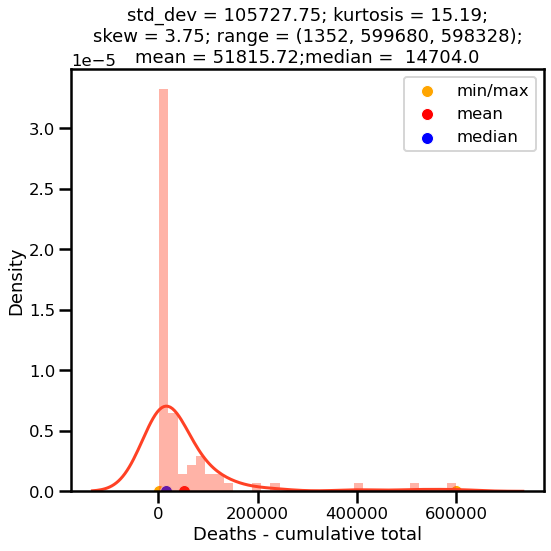

In [200]:
a.eda_univariate_cont(covid_data['Deaths - cumulative total'])

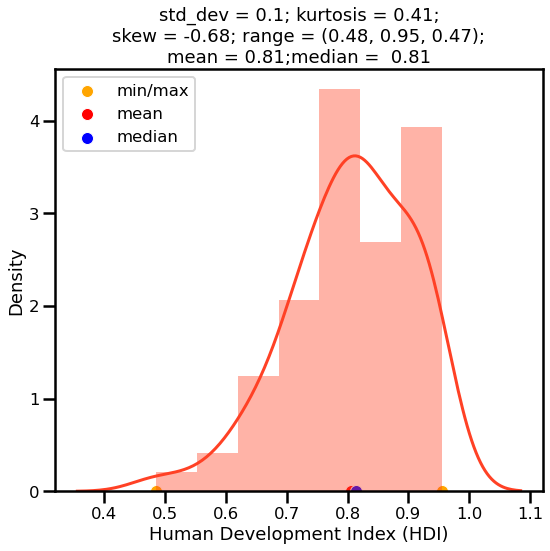

In [201]:
a.eda_univariate_cont(covid_data['Human Development Index (HDI)'])

In [185]:
correlation = df.corr()

<AxesSubplot:>

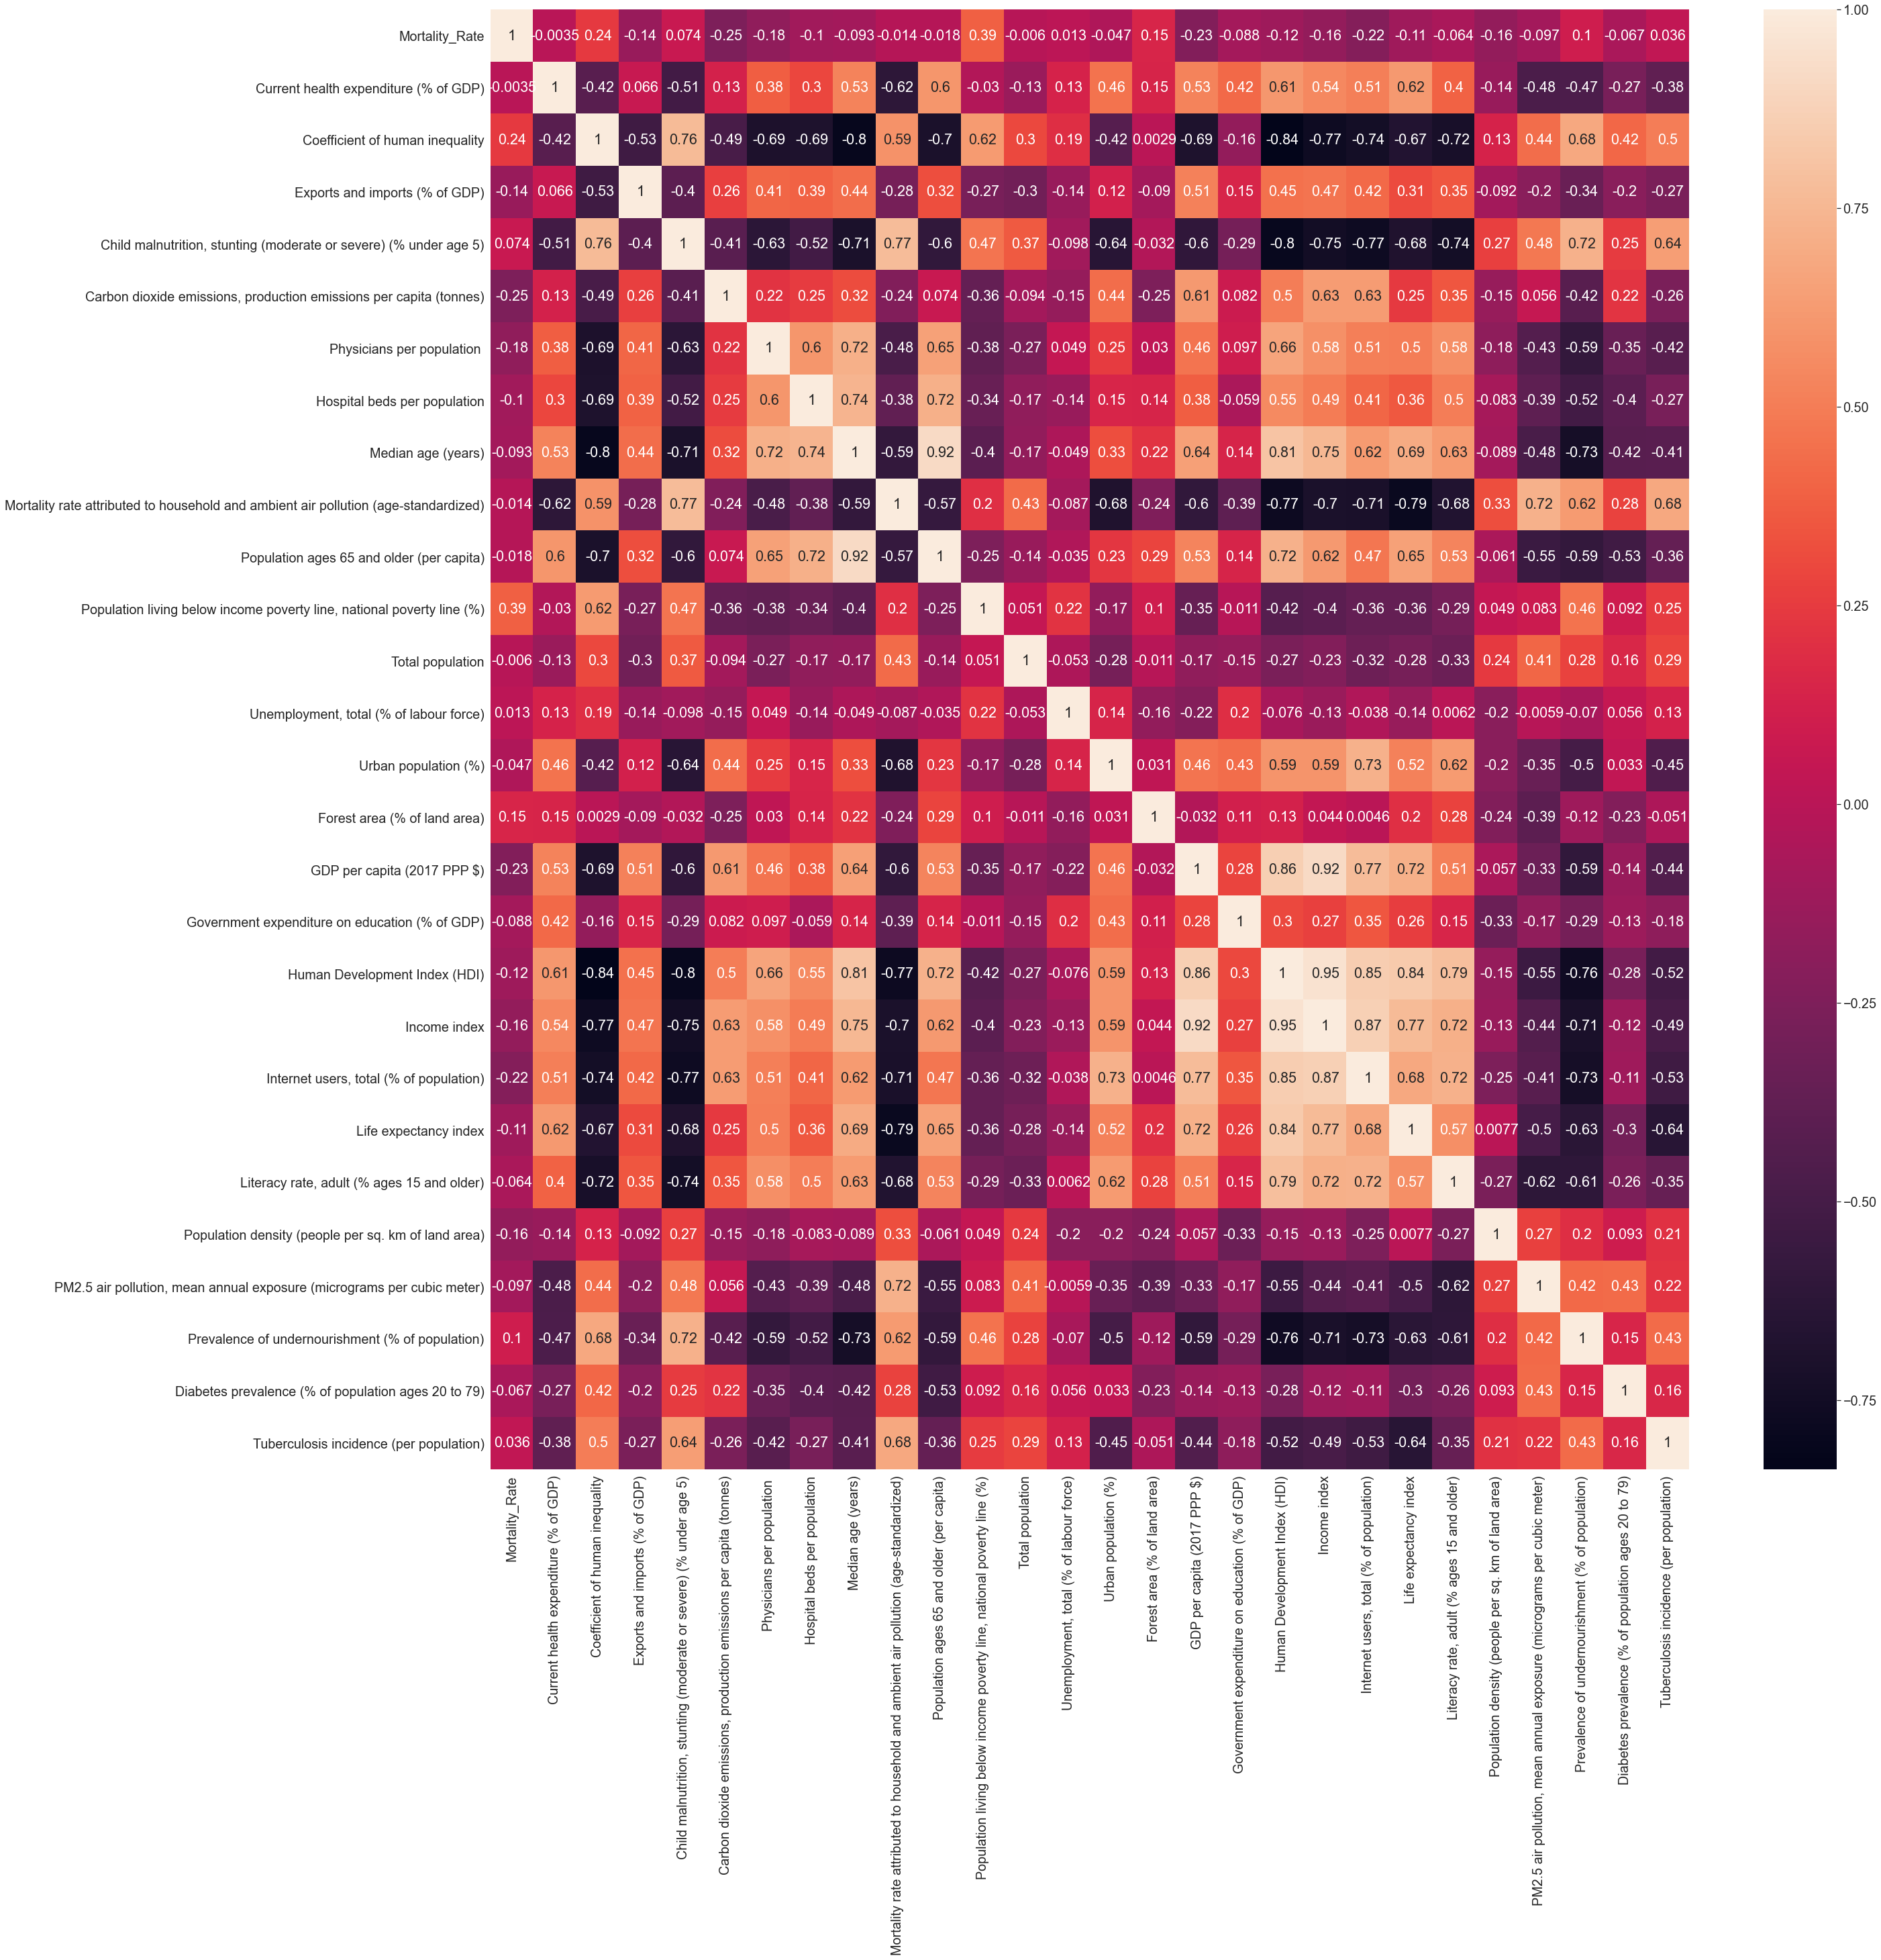

In [186]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1.8)
sns.heatmap(correlation,annot=True)

In [45]:
sns.pairplot(covid_data, kind = "reg")

In [189]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,12):
    KM = KMeans(n_clusters=i)
    KM.fit(df[intColumns])
    wss.append(KM.inertia_)

In [190]:
wss

[89.36321226950194,
 59.443734621155315,
 48.154421009195616,
 43.360053986317965,
 39.233010808773855,
 35.690809789286384,
 33.685863458979696,
 32.06920458101334,
 29.7159214981159,
 28.710240245433937,
 26.659901977953997]

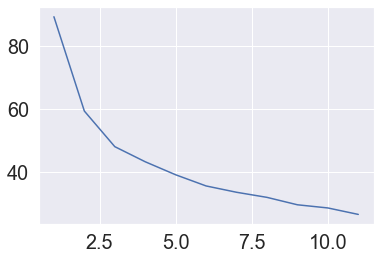

In [196]:
plt.plot(range(1,12), wss)

In [199]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df[intColumns])
labels = k_means.labels_
df["Cluster"] = labels
df.head(5)

Mortality_Rate  Current health expenditure (% of GDP)  \
0        0.166438                               1.000000   
1        0.113153                               0.144654   
2        0.275752                               0.522013   
3        0.182497                               0.635220   
4        0.238759                               0.257862   

   Coefficient of human inequality  Exports and imports (% of GDP)  \
0                         0.287313                        0.000000   
1                         0.794776                        0.063910   
2                         0.746269                        0.012218   
3                         0.167910                        0.179041   
4                         0.208955                        0.106673   

   Child malnutrition, stunting (moderate or severe) (% under age 5)  \
0                                           0.040000                   
1                                           0.733333                   
2                                           0.117778                   
3                                           0.047810                   
4                                           0.083998                   

   Carbon dioxide emissions, production emissions per capita (tonnes)  \
0                                           0.699153                    
1                                           0.080508                    
2                                           0.088983                    
3                                           0.216102                    
4                                           0.491525                    

   Physicians per population   Hospital beds per population  \
0                    0.336078                      0.202681   
1                    0.077628                      0.018139   
2                    0.270143                      0.141167   
3                    0.432571                      0.442429   
4                    0.542540                      0.537855   

   Median age (years)  \
0            0.650519   
1            0.307958   
2            0.484429   
3            0.788927   
4            0.695502   

   Mortality rate attributed to household and ambient air pollution (age-standardized)  \
0                                           0.032086                                     
1                                           0.946524                                     
2                                           0.122995                                     
3                                           0.016043                                     
4                                           0.224599                                     

   ...  Life expectancy index  Literacy rate, adult (% ages 15 and older)  \
0  ...               0.720635                                    0.953226   
1  ...               0.269841                                    0.468880   
2  ...               0.574603                                    0.858921   
3  ...               0.904762                                    0.963211   
4  ...               0.412698                                    0.993776   

   Population density (people per sq. km of land area)  \
0                                           0.025571     
1                                           0.364852     
2                                           0.016937     
3                                           0.095835     
4                                           0.003794     

   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
0                                           0.013092                        
1                                           0.905279                        
2                                           0.069717                        
3                                           0.060185                        
4                                           0.106634                        

   

In [200]:
df.groupby("Cluster").mean()

Mortality_Rate  Current health expenditure (% of GDP)  \
Cluster                                                          
0              0.203007                               0.484501   
1              0.242287                               0.228834   
2              0.210994                               0.319943   

         Coefficient of human inequality  Exports and imports (% of GDP)  \
Cluster                                                                    
0                               0.158316                        0.365249   
1                               0.760046                        0.121566   
2                               0.423994                        0.229854   

         Child malnutrition, stunting (moderate or severe) (% under age 5)  \
Cluster                                                                      
0                                                 0.061167                   
1                                                 0.620000                   
2                                                 0.186166                   

         Carbon dioxide emissions, production emissions per capita (tonnes)  \
Cluster                                                                       
0                                                 0.312197                    
1                                                 0.085398                    
2                                                 0.248496                    

         Physicians per population   Hospital beds per population  \
Cluster                                                             
0                          0.515006                      0.410462   
1                          0.067376                      0.049321   
2                          0.345216                      0.184396   

         Median age (years)  \
Cluster                       
0                  0.796589   
1                  0.188448   
2                  0.443800   

         Mortality rate attributed to household and ambient air pollution (age-standardized)  \
Cluster                                                                                        
0                                                 0.092055                                     
1                                                 0.625668                                     
2                                                 0.238399                                     

         ...  Human Development Index (HDI)  Income index  \
Cluster  ...                                                
0        ...                       0.877736      0.846106   
1        ...                       0.353028      0.331611   
2        ...                       0.642210      0.605040   

         Internet users, total (% of population)  Life expectancy index  \
Cluster                                                                   
0                                       0.800912               0.785828   
1                                       0.286870               0.314774   
2                                       0.656905               0.589657   

         Literacy rate, adult (% ages 15 and older)  \
Cluster                                               
0                                          0.968700   
1                                          0.562400   
2                                          0.882073   

         Population density (people per sq. km of land area)  \
Cluster                                                        
0                                                 0.117182     
1                                                 0.212249     
2                                                 0.079638     

         PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
Cluster                                                                           
0                                                 0.076455                        

In [207]:
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax', n_factors=7)
fa.fit(df[intColumns])
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.22752050e+01, 2.55328735e+00, 2.27861782e+00, 1.38011260e+00,
       1.24758483e+00, 1.04948144e+00, 1.00827042e+00, 9.34290412e-01,
       8.54890552e-01, 6.10221213e-01, 5.79715265e-01, 5.27388367e-01,
       4.92994445e-01, 3.72154114e-01, 3.57726876e-01, 2.67275708e-01,
       2.37315286e-01, 1.87429060e-01, 1.70943418e-01, 1.57728571e-01,
       1.26549878e-01, 9.46304237e-02, 8.49325445e-02, 5.29083996e-02,
       4.25895744e-02, 3.06109668e-02, 1.46225582e-02, 1.05229278e-02])

In [208]:
sorted(ev)

[0.010522927768987608,
 0.014622558186507376,
 0.030610966791215707,
 0.04258957444132066,
 0.05290839958547372,
 0.08493254448642396,
 0.09463042366645519,
 0.12654987802927145,
 0.15772857120680683,
 0.17094341824768047,
 0.18742906032560142,
 0.23731528554556724,
 0.2672757077607338,
 0.3577268759118976,
 0.372154113955545,
 0.4929944453076554,
 0.5273883670319085,
 0.5797152650819136,
 0.6102212126642841,
 0.8548905521475532,
 0.9342904118789392,
 1.0082704227689128,
 1.0494814434187092,
 1.2475848257230913,
 1.3801125979399054,
 2.278617816707403,
 2.553287354268216,
 12.275204979152011]

In [209]:
fa.loadings_

array([[-0.10829898, -0.03178873, -0.14907424, -0.05119181,  0.37033574,
         0.05714866,  0.0086753 ],
       [ 0.34519232,  0.59631458,  0.14877784,  0.08137454,  0.1978533 ,
         0.27712861,  0.24028084],
       [-0.74009751, -0.32857454, -0.34440887,  0.26332925,  0.22828037,
         0.18172256,  0.01870078],
       [ 0.38723811,  0.04661122,  0.1533342 , -0.4136798 , -0.26353579,
        -0.17449227,  0.31923693],
       [-0.52206173, -0.54881378, -0.3546223 ,  0.34374269,  0.11546572,
        -0.12774123,  0.15122245],
       [ 0.07937247,  0.11033549,  0.74696596, -0.06709588, -0.37008485,
        -0.09911703,  0.03513924],
       [ 0.70819239,  0.22214532,  0.14123701, -0.22899384, -0.12324007,
         0.06846446, -0.01104832],
       [ 0.78356688,  0.02104545,  0.16460986, -0.11283659,  0.00198181,
        -0.10265118, -0.03774066],
       [ 0.87407119,  0.30155768,  0.26640145,  0.01510114,  0.02954796,
         0.00442447,  0.08132693],
       [-0.32756725, -0.7474

In [210]:
df_factors = pd.DataFrame(fa.loadings_, columns = ["Factor1","Factor2","Factor3","Factor4","Factor5","Factor6","Factor7"], index = intColumns)
df_factors

Factor1   Factor2  \
Mortality_Rate                                     -0.108299 -0.031789   
Current health expenditure (% of GDP)               0.345192  0.596315   
Coefficient of human inequality                    -0.740098 -0.328575   
Exports and imports (% of GDP)                      0.387238  0.046611   
Child malnutrition, stunting (moderate or sever... -0.522062 -0.548814   
Carbon dioxide emissions, production emissions ...  0.079372  0.110335   
Physicians per population                           0.708192  0.222145   
Hospital beds per population                        0.783567  0.021045   
Median age (years)                                  0.874071  0.301558   
Mortality rate attributed to household and ambi... -0.327567 -0.747444   
Population ages 65 and older (per capita)           0.883317  0.329420   
Population living below income poverty line, na... -0.393057 -0.143366   
Total population                                   -0.120701 -0.210184   
Unemployment, total (% of labour force)            -0.038948 -0.004931   
Urban population (%)                                0.025349  0.571646   
Forest area (% of land area)                        0.166641  0.079028   
GDP per capita (2017 PPP $)                         0.371794  0.476304   
Government expenditure on education (% of GDP)     -0.021811  0.356467   
Human Development Index (HDI)                       0.594263  0.533605   
Income index                                        0.474545  0.479887   
Internet users, total (% of population)             0.339454  0.500584   
Life expectancy index                               0.435124  0.812255   
Literacy rate, adult (% ages 15 and older)          0.502971  0.279474   
Population density (people per sq. km of land a... -0.035438 -0.052987   
PM2.5 air pollution, mean annual exposure (micr... -0.440540 -0.311545   
Prevalence of undernourishment (% of population)   -0.540876 -0.393589   
Diabetes prevalence (% of population ages 20 to... -0.522738 -0.114142   
Tuberculosis incidence (per population)            -0.215442 -0.630330   

                                                     Factor3   Factor4  \
Mortality_Rate                                     -0.149074 -0.051192   
Current health expenditure (% of GDP)               0.148778  0.081375   
Coefficient of human inequality                    -0.344409  0.263329   
Exports and imports (% of GDP)                      0.153334 -0.413680   
Child malnutrition, stunting (moderate or sever... -0.354622  0.343743   
Carbon dioxide emissions, production emissions ...  0.746966 -0.067096   
Physicians per population                           0.141237 -0.228994   
Hospital beds per population                        0.164610 -0.112837   
Median age (years)                                  0.266401  0.015101   
Mortality rate attributed to household and ambi... -0.247113  0.391679   
Population ages 65 and older (per capita)           0.040135  0.084797   
Population living below income poverty line, na... -0.238289  0.070035   
Total population                                   -0.033543  0.556602   
Unemployment, total (% of labour force)            -0.077875 -0.081228   
Urban population (%)                                0.540324 -0.221875   
Forest area (% of land area)                       -0.014100 -0.024277   
GDP per capita (2017 PPP $)                         0.549762 -0.041552   
Government expenditure on education (% of GDP)      0.148879 -0.182135   
Human Development Index (HDI)                       0.526543 -0.129225   
Income index                                        0.654610 -0.093608   
Internet users, total (% of population)             0.654908 -0.273461   
Life expectancy index                               0.180112 -0.022137   
Literacy rate, adult (% ages 15 and older)          0.523426 -0.346999   
Population density (people per sq. km of land a... -0.165186  0.426982   
PM2.5 air pollution, mean annual exposure (micr... -0.08

In [218]:
fa = FactorAnalyzer(rotation='varimax', n_factors=7)
test = fa.fit_transform(df[intColumns])
df_reduced = pd.DataFrame(test, columns = ["Factor1","Factor2","Factor3","Factor4","Factor5","Factor6","Factor7"])
df_reduced.head()

Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7
0 -0.229795  0.934806  1.820485  1.444227  0.819996  0.604722  1.045601
1 -0.540306 -1.196401 -0.470123  3.606787 -0.711404 -0.257247 -0.500739
2 -0.804695  0.307742  0.413889  0.455450  1.547158  1.610081 -0.374365
3  0.669924  1.214965 -0.016400  0.551212  0.066961  0.010659  0.598267
4  0.701096 -1.150149  1.230613 -0.674215  0.258109  0.004753 -0.865098

In [220]:
df_reduced["WHO Region"] = df["WHO Region"]
df_reduced.head()

Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0 -0.229795  0.934806  1.820485  1.444227  0.819996  0.604722  1.045601   
1 -0.540306 -1.196401 -0.470123  3.606787 -0.711404 -0.257247 -0.500739   
2 -0.804695  0.307742  0.413889  0.455450  1.547158  1.610081 -0.374365   
3  0.669924  1.214965 -0.016400  0.551212  0.066961  0.010659  0.598267   
4  0.701096 -1.150149  1.230613 -0.674215  0.258109  0.004753 -0.865098   

                       Name       WHO Region  
0  United States of America         Americas  
1                     India  South-East Asia  
2                    Brazil         Americas  
3                    France           Europe  
4        Russian Federation           Europe

In [221]:
df_reduced.shape

(72, 9)

In [227]:
plt.figure(figsize=(15,10))
sns.heatmap(df_reduced.corr(), annot = True, cmap = "Blues")

<AxesSubplot:>